In [ ]:
! pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os  # it us used to deal with files
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
# it is a path variable. By this, we don't need to specify path everytime
data_dir = '/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset'

In [ ]:
os.listdir(data_dir)

['train', 'val']

In [ ]:
os.listdir(os.path.join(data_dir,'train/female'))

In [ ]:
# image extensions
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
image_exts  # it is a list of extensions

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000036.jpg'))

In [ ]:
img.shape

(1915, 2381, 3)

In [ ]:
# remove unsupported file types
from pathlib import Path
import imghdr
import os

data_dir = "/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset"
image_extensions = [".jpg",".png",".jpeg",".png"]

img_type_accepted_by_tf = ['jpeg','jpg','bmp','png']
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            # Delete the file
            os.remove(filepath)
            print(f"{filepath} has been deleted")


/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000007.jpg is not an image
/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000026.jpg is not an image
/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000033.jpg is not an image
/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000046.jpg is not an image
/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000088.jpg is not an image
/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000189.jpg is not an image
/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female/00000077.jpg is not an image
/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classific

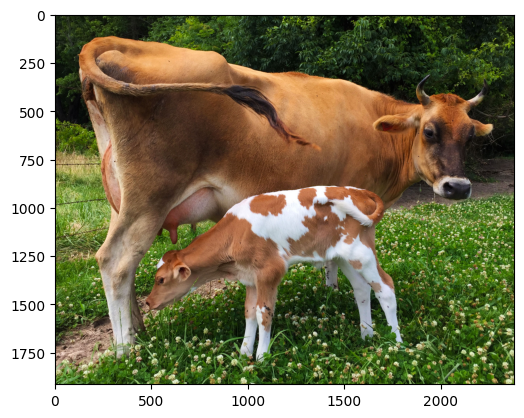

In [ ]:
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))   # IT WILL SHOW THE IMAGE WITH ORIGINAL COLORS
plt.show()  # It removes the address line above the image

In [ ]:
type(img)   # image is converted to numpy array here

numpy.ndarray

In [ ]:
# we are looping through every image of both folders
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with Image {}'.format(image_path))

Issue with Image /content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/female
Issue with Image /content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train/male
Issue with Image /content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/val/male
Issue with Image /content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/val/female


In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1928 files belonging to 2 classes.


Now, we will create a dataset in which each subdirectory represents a particular label

In [ ]:
# here we can restructure our images instead of using default ones which can be seen using 'tf.keras.utils.image_dataset_from_directory(data_dir)'
tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=8,image_size=(128,128))

Found 1928 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# get another batch from iterator
batch = data_iterator.next()

In [ ]:
batch

(array([[[[100.418945 ,  74.333984 ,  51.250977 ],
          [101.99219  ,  75.243164 ,  52.249023 ],
          [107.59473  ,  79.76465  ,  53.754883 ],
          ...,
          [166.9248   , 131.99023  ,  90.16992  ],
          [169.74707  , 129.00195  ,  86.99805  ],
          [166.66602  , 131.41699  ,  86.91699  ]],
 
         [[ 88.33203  ,  72.74902  ,  48.5      ],
          [ 93.756836 ,  75.256836 ,  46.756836 ],
          [ 96.76465  ,  80.83984  ,  52.91504  ],
          ...,
          [167.0752   , 132.41504  ,  90.490234 ],
          [164.25098  , 130.24707  ,  86.25488  ],
          [167.       , 128.91699  ,  87.666016 ]],
 
         [[106.75098  ,  88.91699  ,  58.58496  ],
          [112.2666   ,  93.00586  ,  61.25293  ],
          [120.16992  ,  97.859375 ,  67.41504  ],
          ...,
          [169.50977  , 131.5      ,  89.83984  ],
          [170.49805  , 132.99805  ,  87.99609  ],
          [168.58301  , 130.41699  ,  88.166016 ]],
 
         ...,
 
         [[1

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# labels
# 1 - bull
# 0 - cow
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [ ]:
# x -->  features, y --> labels
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

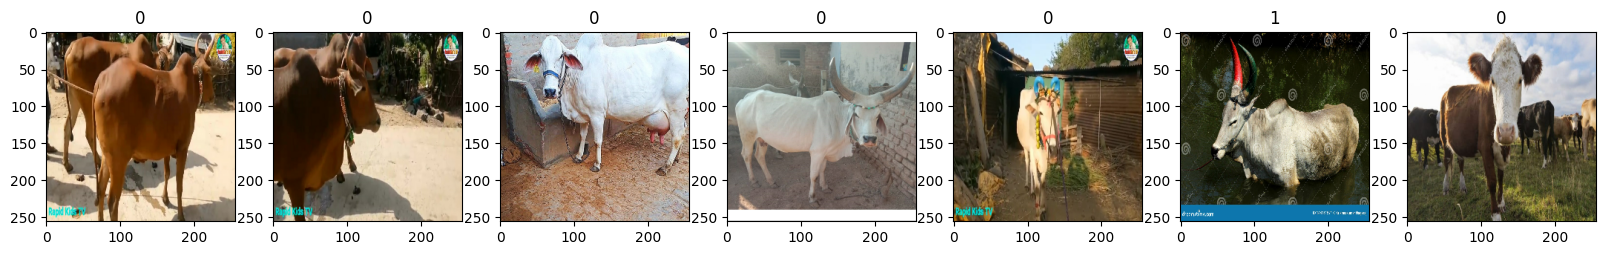

In [ ]:
# we can see which label is representing which value

fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)   # number of batches

61

In [ ]:
import tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load VGG16 with pre-trained weights and exclude the fully connected layers
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

# Create a new model by adding custom layers on top of the VGG16 base
model = models.Sequential()
model.add(conv_base)

# Custom layers
model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size
batch_size = 32

# Data augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Data preprocessing configuration for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data with data augmentation
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary')

# Load validation data without data augmentation
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/val',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary')


Found 1499 images belonging to 2 classes.
Found 426 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 16)          73744     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 16)          4

In [ ]:
logdir = '/content/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Fit the model using data augmentation
hist = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=12,
    callbacks=[tensorboard_callback]
)

Epoch 1/12
 3/47 [>.............................] - ETA: 21s - loss: 0.6975 - accuracy: 0.4479

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


47/47 [==============================] - 64s 998ms/step - loss: 0.5016 - accuracy: 0.7292 - val_loss: 0.2290 - val_accuracy: 0.8826
Epoch 2/12
47/47 [==============================] - 40s 857ms/step - loss: 0.2898 - accuracy: 0.8773 - val_loss: 0.1989 - val_accuracy: 0.9038
Epoch 3/12
47/47 [==============================] - 40s 857ms/step - loss: 0.2232 - accuracy: 0.9093 - val_loss: 0.1720 - val_accuracy: 0.9413
Epoch 4/12
47/47 [==============================] - 41s 868ms/step - loss: 0.1630 - accuracy: 0.9400 - val_loss: 0.1630 - val_accuracy: 0.9390
Epoch 5/12
47/47 [==============================] - 41s 864ms/step - loss: 0.1337 - accuracy: 0.9506 - val_loss: 0.1577 - val_accuracy: 0.9531
Epoch 6/12
47/47 [==============================] - 40s 857ms/step - loss: 0.1048 - accuracy: 0.9593 - val_loss: 0.2344 - val_accuracy: 0.9249
Epoch 7/12
47/47 [==============================] - 40s 858ms/step - loss: 0.1040 - accuracy: 0.9633 - val_loss: 0.2620 - val_accuracy: 0.9272
Epoch 8/12

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/model/Gender_Classification.h5')  # Save to Google Drive if needed

In [ ]:
hist.history  # information about how values are changing

{'loss': [0.5016103386878967,
  0.2897868752479553,
  0.22317659854888916,
  0.16302664577960968,
  0.13374780118465424,
  0.10483791679143906,
  0.10400199145078659,
  0.07972631603479385,
  0.07497752457857132,
  0.08174712210893631,
  0.04634423181414604,
  0.04550229758024216],
 'accuracy': [0.7291527390480042,
  0.8772515058517456,
  0.9092728495597839,
  0.9399600028991699,
  0.9506337642669678,
  0.9593061804771423,
  0.9633088707923889,
  0.9739826321601868,
  0.9733155369758606,
  0.969980001449585,
  0.9859906435012817,
  0.9826551079750061],
 'val_loss': [0.22904914617538452,
  0.1989336460828781,
  0.17198626697063446,
  0.16300608217716217,
  0.15770089626312256,
  0.23441459238529205,
  0.26195722818374634,
  0.1986684650182724,
  0.19989946484565735,
  0.2036275416612625,
  0.22656938433647156,
  0.22277948260307312],
 'val_accuracy': [0.8826290965080261,
  0.9037558436393738,
  0.9413145780563354,
  0.9389671087265015,
  0.9530516266822815,
  0.9248826503753662,
  0.927

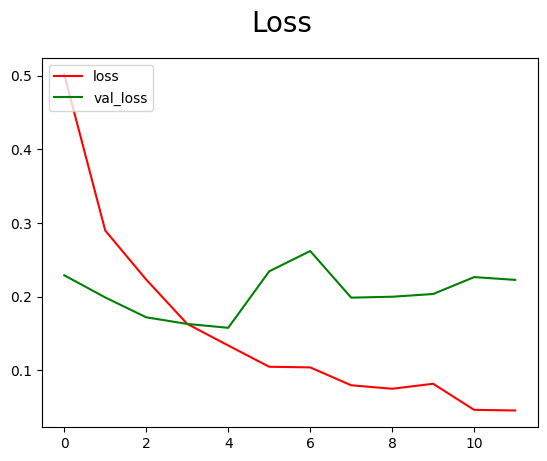

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='red',label='loss')
plt.plot(hist.history['val_loss'],color='green',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

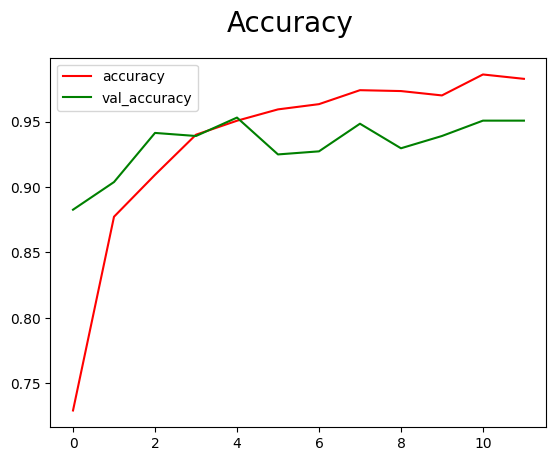

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='green',label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Set the paths for train and validation data
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/train'
val_data_dir = '/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/dataset/val'

# Define constants
image_height = 256
image_width = 256
batch_size = 32

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/model/Gender_Classification.h5')  # Replace with the path to your trained model file

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  # Or 'categorical' if you have more than 2 classes
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',  # Or 'categorical'
    shuffle=False
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


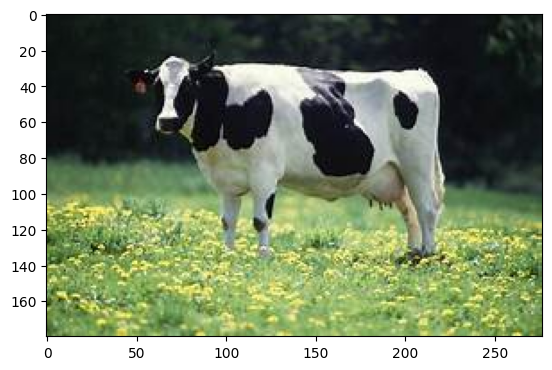

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ML_Projects_Practice/Gender_Classification/1.3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

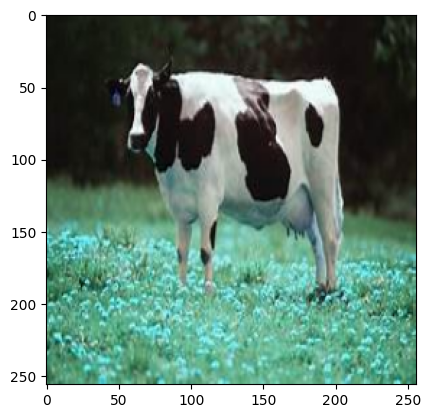

In [ ]:
# resize the image before passing to neural network model
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
# we made a extra set of array here if we compare to previous cell, because we model expects to pass a batch of images
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 808ms/step


In [ ]:
yhat

array([[2.16842e-05]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print("you saw a bull !!!")
else:
  print("It's a cow !!!")

It's a cow !!!
